In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

### Phys 224 Lab 4 (Ohm's Law)

#### Stainless steel wire, length kept constant at 24cm, varying current (Table 1)

Calculated resistance: 0.2501 Ohms


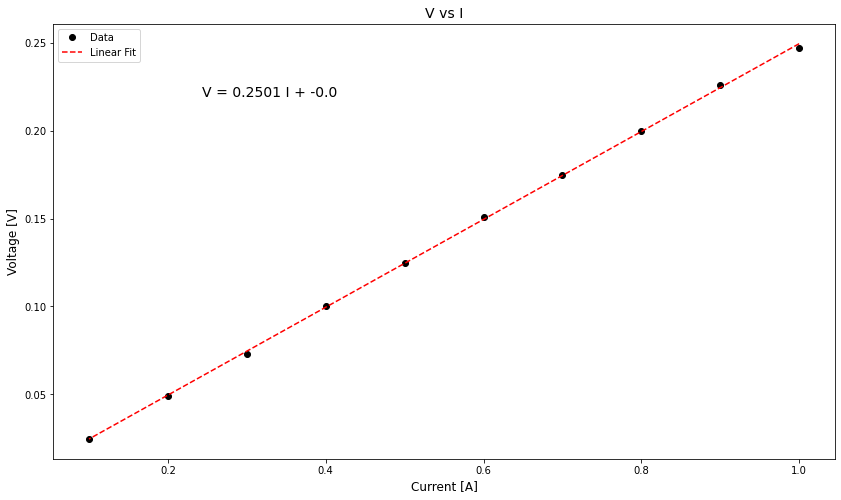

In [2]:
I = np.array([1,.9,.8,.7,.6,.5,.4,.3,.2,.1]) # [A]
V = np.array([.247,.226,.2,.175,.151,.125,.1,.073,.049,.0246]) # [V]
plt.figure(figsize=[14,8])
plt.plot(I, V, 'k.', label = 'Data', markersize = 12)

# line fit
def model(x,m,b):
    y = m*x+b
    return y
fit = curve_fit(f = model ,xdata = I, ydata = V )
y = fit[0][0] * I + fit[0][1] # V = RI
plt.plot(I,y, 'r--', label = 'Linear Fit')

plt.ylabel('Voltage [V]', fontsize =12)
plt.xlabel('Current [A]', fontsize = 12)
plt.annotate(f'V = {np.round(fit[0][0],5)} I + {np.round(fit[0][1],3)}', 
             xy = [0.2,0.7], xycoords = 'figure fraction', fontsize = 14)
plt.title('V vs I', fontsize = 14)
plt.legend()
print(f'Calculated resistance: {np.round(fit[0][0],5)} Ohms')

#### Brass wire with D = 0.04in, varying length and keeping current constant at 1A (Table 2)

Calculated resistivity: 7.279214834589958e-08 Ohm * m


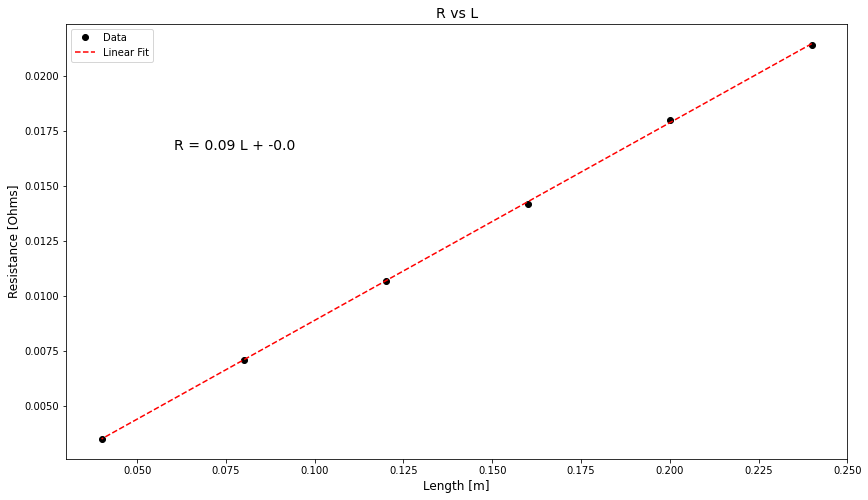

In [4]:
V = np.array([0.0214, 0.018, 0.0142, 0.0107, 0.0071, 0.0035]) # [V]
I = np.array([1 for i in range(len(V))]) # [A]
R = V/I # [Ohms]
l = np.array([0.24,0.2,0.16,0.12,0.08,0.04]) # [m]

# linear fit
def model(x,m,b):
    y = m*x+b
    return y
fit = curve_fit(f = model ,xdata = l, ydata = R )
y = fit[0][0] * l + fit[0][1] # R = pl/A

plt.figure(figsize=[14,8])
plt.plot(l, R, 'k.' , label = 'Data', markersize = 12)
plt.plot(l, y, 'r--', label = 'Linear Fit')
plt.legend()

plt.xlabel('Length [m]', fontsize =12)
plt.ylabel('Resistance [Ohms]', fontsize = 12)
plt.annotate(f'R = {np.round(fit[0][0],3)} L + {np.round(fit[0][1],3)}', 
             xy = [0.2,0.7], xycoords = 'figure fraction', fontsize = 14)
plt.title('R vs L', fontsize = 14)
plt.legend()

D = 0.04 * 0.0254 # [m]
A = np.pi * (D**2) / 4 # [m^2]
print(f'Calculated resistivity: {fit[0][0] * A} Ohm * m')

#### 4 different brass wires, keeping current constant at 1A, length = 24cm (Table 3)

Calculated resistivity: 7.443982081772332e-08 Ohm * m


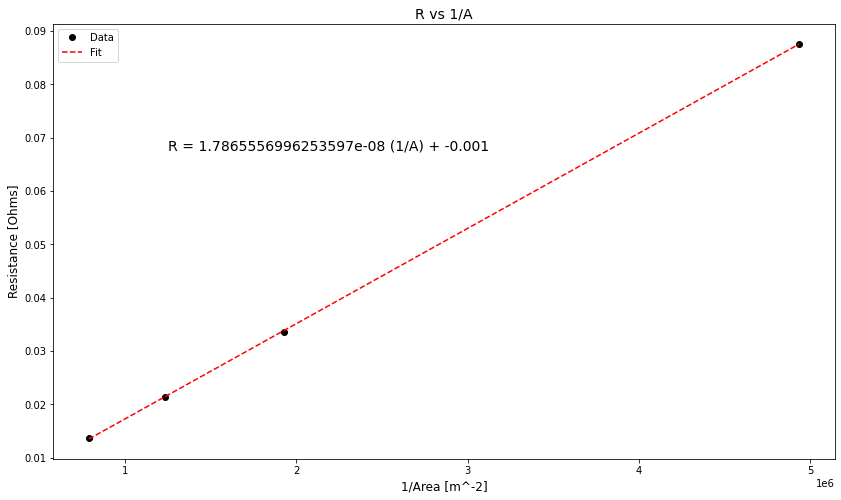

In [5]:
D = np.array([0.05, 0.04, 0.032, 0.02]) * 0.0254 # [m]
I = np.array([1 for i in range(len(D))]) # [A]
V = np.array([0.0137, 0.0214, 0.0335, 0.0876]) # [V]
L = 0.24 # [m]
R = V/I # [Ohm]
A = np.pi * (D**2) / 4 # [m^2]

# linear fit
def model(x,m,b):
    y = m*x+b
    return y
fit = curve_fit(f = model ,xdata = 1/A, ydata = R )
y = fit[0][0] * (1/A) + fit[0][1] # R = pl/A

plt.figure(figsize = [14,8])
plt.plot(1/A, R, 'k.', label = 'Data', markersize = 12)
plt.plot(1/A, y, 'r--', label = 'Fit')

plt.xlabel('1/Area [m^-2]', fontsize = 12)
plt.ylabel('Resistance [Ohms]', fontsize = 12)
plt.title('R vs 1/A', fontsize = 14)
plt.legend()

plt.annotate(f'R = {fit[0][0]} (1/A) + {np.round(fit[0][1],3)}', 
             xy = [0.2,0.7], xycoords = 'figure fraction', fontsize = 14)

print(f'Calculated resistivity: {fit[0][0] / L} Ohm * m')

### Phys 224 Lab 6 (Earth's Magnetic Field)

In [2]:
mu0 = 4 * np.pi * 10**-7 #[T*m/A]

## Table 1 ##
r = 0.105 # [m]
N = 200 # turns

## Table 2 ##
I_0 = 0 # [A]
t20_0 = 114 # [s]
T_0 = t20_0 / 20 # [s]
table2 = pd.DataFrame({'I [A]':[I_0], 't_20 [s]':[t20_0], 'T [s]':[T_0], '1/T^2 [s^-2]': [1/T_0**2]})

## Table 3 ##
I = np.array([0.15,0.3,0.45,0.6,0.75,0.9,1.05,1.20]) # [A]
t20 = np.array([28.28, 20.47, 16.75, 14.34, 12.75, 11.65, 10.81, 10.09]) # [s]
T = t20 / 20 # [1/s]
table3 = pd.DataFrame({'I [A]':I, 't_20 [s]':t20, 'T [s]':T, '1/T^2 [s^-2]':1/T**2})

In [3]:
print('\t Table 2')
table2

	 Table 2


,I [A],t_20 [s],T [s],1/T^2 [s^-2]
0,0,114,5.7,0.030779


In [4]:
print('\t Table 3')
table3

	 Table 3


,I [A],t_20 [s],T [s],1/T^2 [s^-2]
0,0.15,28.28,1.4140,0.500151
1,0.30,20.47,1.0235,0.954606
2,0.45,16.75,0.8375,1.425707
3,0.60,14.34,0.7170,1.945188
4,0.75,12.75,0.6375,2.460592
5,0.90,11.65,0.5825,2.947190
6,1.05,10.81,0.5405,3.423013
7,1.20,10.09,0.5045,3.928960


C0 = -0.02094279268075505 [1/s^2]
C1 = 3.287583606581092 [1/(A*s^2)]


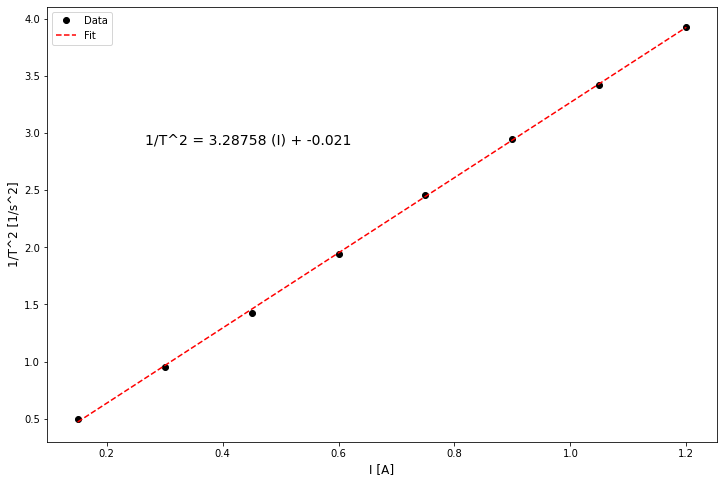

In [5]:
plt.figure(figsize = [12,8])
plt.plot(I, 1/T**2, 'k.', markersize = 12, label = 'Data')
plt.ylabel('1/T^2 [1/s^2]', fontsize = 12)
plt.xlabel('I [A]', fontsize = 12)

# linear fit
def model(x,m,b):
    y = m*x+b
    return y
fit = curve_fit(f = model ,xdata = I, ydata = 1/T**2 )
y = fit[0][0] * (I) + fit[0][1] # 1/T^2 = C1 * I + C0
plt.plot(I,y, 'r--', label = 'Fit')

plt.legend()

plt.annotate(f'1/T^2 = {np.round(fit[0][0],5)} (I) + {np.round(fit[0][1],3)}', 
             xy = [0.2,0.7], xycoords = 'figure fraction', fontsize = 14)

C0 = fit[0][1]
C1 = fit[0][0]
print(f'C0 = {C0} [1/s^2]\nC1 = {C1} [1/(A*s^2)]')

In [6]:
B_earth_h1 = (C0/C1) * ((4/5)**(3/2)) * mu0 * N / r
print(f'B_earth_h* = {B_earth_h1}  [T]')

B_earth_h* = -1.091046670816928e-05  [T]


In [8]:
C2 = C1 * ((5/4)**(3/2)) * r / (mu0 * N)
print(f'C2 = {C2} [T^-1 * s^-2]')

C2 = 1919.5139164004788 [T^-1 * s^-2]


In [9]:
B_earth_h2 = (1/C2) * (1/T_0**2)
print(f'B_earth_h** = {B_earth_h2}  [T]')

B_earth_h** = 1.6034632974440185e-05  [T]


### Phys 224 Lab 7 (Magnetic Force and Current Balance)

In [2]:
r = 1.5 * (10**-3) # [m]
L = 26.6 * (10**-2) # [m]
D1 = 21.7 * (10**-2) # [m]
D2 = 1 # [m]
h0 = 32.9 * (10**-2) # [m]
h = 38.8 * (10**-2) # [m]
d = (D1 * (h-h0) / (2*D2)) + (2*r) # [m]

table1 = pd.DataFrame({'r [m]':[r], 'L [m]': [L], 'D1 [m]': [D1], 'D2 [m]': [D2],
                       'h0 [m]': [h0], 'h [m]': [h], 'd [m]': [d]})
print('\t-----Table 1-----')
table1

	-----Table 1-----


,r [m],L [m],D1 [m],D2 [m],h0 [m],h [m],d [m]
0,0.0015,0.266,0.217,1,0.329,0.388,0.009401


In [7]:
m = [5,10,20,30,40] # [g]
for i in range(len(m)):
    m[i] = m[i]*(10**-6) #convert to kg

I = np.array([1.81, 2.1, 4.53, 5.97, 6.48])
Reversed = np.array([1.81, 2.11, 4.54, 5.95, 6.46])
I_avg = (I + Reversed) / 2
I_avg_sq = I_avg**2 # [A^2] #np.array([I_avg**2 for i in range(len(I_avg))])

table2 = pd.DataFrame({'Mass [kg]': m, 'I [A]': I, 'Reversed [A]': Reversed,
                       'I_avg [A]': I_avg, 'I_avg_sq [A^2]': I_avg_sq})
print('\t  -----Table 2-----')
table2

	  -----Table 2-----


,Mass [kg],I [A],Reversed [A],I_avg [A],I_avg_sq [A^2]
0,0.000005,1.81,1.81,1.810,3.276100
1,0.000010,2.10,2.11,2.105,4.431025
2,0.000020,4.53,4.54,4.535,20.566225
3,0.000030,5.97,5.95,5.960,35.521600
4,0.000040,6.48,6.46,6.470,41.860900


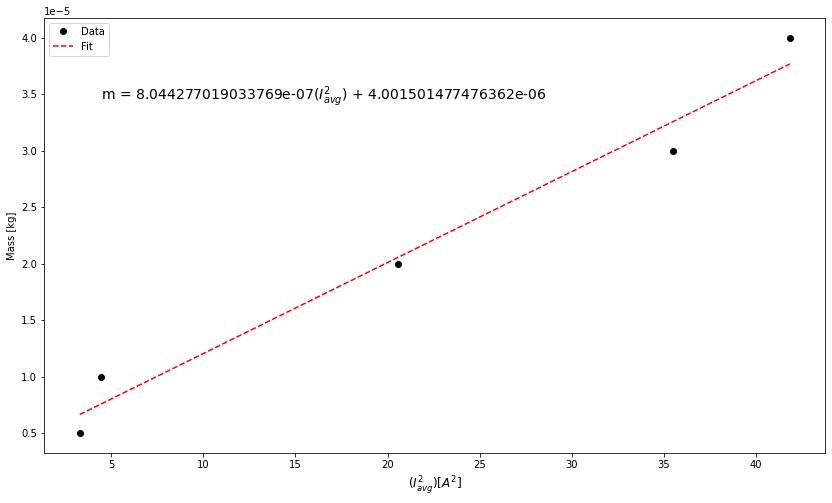

In [13]:
plt.figure(figsize = [14,8])
plt.plot(I_avg_sq, m , 'k.', markersize = 12, label = 'Data')

# linear fit
def model(x,m,b):
    y = m*x+b
    return y
fit = curve_fit(f = model ,xdata = I_avg_sq, ydata = m)
y = fit[0][0] * (I_avg_sq) + fit[0][1]
plt.plot(I_avg_sq,y, 'r--', label = 'Fit')

plt.legend()
plt.xlabel(r'$ (I_{avg}^{2}) [A^{2}]$', fontsize = 12)
plt.ylabel('Mass [kg]')
plt.annotate(f'm = {fit[0][0]}' + r'$ (I_{avg}^{2})$' + f' + {fit[0][1]}', 
             xy = [0.1,0.7], xycoords = 'figure fraction', fontsize = 14)

y_intercept = fit[0][1]
slope = fit[0][0]

In [5]:
g = 9.8 # [m/s^2]
mu0 = (2 * np.pi * g * d * slope) / L
mu0_true = 4 * np.pi * (10**-7)
error = (mu0 - mu0_true) / mu0_true
print(f'''Calculated µ0 = {mu0} [T*m/A]
Error: {error*100} %''')

Calculated µ0 = 1.750686874446586e-06 [T*m/A]
Error: 39.31523493713725 %


### Phys 224 Lab 8 (Thin Lens and Image Formation)

$$
\frac{1}{f} = \frac{1}{p} + \frac{1}{q}
$$

Where f is the focal length, p is the distance from the object to the lens, and q is the distance from the lens to the formed image. This equation will be used to calculate the focal length in parts a) through e) of the experiment

#### a) Thick bi-convex lens

In [28]:
p = np.array([np.inf, 16, 22, 33]) # [cm]
q = np.array([11, 22.2, 16.5, 13]) # [cm]
f = ((1/q) + (1/p))**-1
table1 = pd.DataFrame({'p [cm]': p, 'q [cm]': q, 'f [cm]': f})
print('Calculated average focal length: ', np.mean(f), ' [cm]')
table1

Calculated average focal length:  9.763271926116225  [cm]


,p [cm],q [cm],f [cm]
0,inf,11.0,11.000000
1,16.0,22.2,9.298429
2,22.0,16.5,9.428571
3,33.0,13.0,9.326087


#### b) Thick bi-convex lens, testing chromatic aberration

In [15]:
p2 = np.array([22, 22]) # [cm]
q2 = np.array([16,16.2]) # [cm]
filters = np.array(['Red', 'Blue'])
f2 = ((1/q2) + (1/p2))**-1

table2 = pd.DataFrame({'Filter': filters, 'p [cm]': p2, 'q [cm]': q2, 'f [cm]': f2})
table2

,Filter,p [cm],q [cm],f [cm]
0,Red,22,16.0,9.263158
1,Blue,22,16.2,9.329843


#### c) Thin bi-convex lens

In [16]:
p3 = 87.7
q3 = 25.3
f3 = ((1/q3) + (1/p3))**-1
print(f'f = {f3} [cm]')

f = 19.635486725663718 [cm]


#### d) Two bi-convex lens together

Now put the two-lens system in a configuration such that:
$$
p \approx \frac{2f_{1,avg}f_{2}}{f_{1,avg}f_{2}}
$$

Where $f_{1,avg}$ is the mean of the focal length from the first set of measurements (thick bi-convex lens) and 
$f_{2}$ is the focal length calculated from the thin bi-convex lens.

In [17]:
(2 * np.mean(f) * f3) / (np.mean(f) + f3)

13.041815715759382

In [18]:
p4 = 12.8
q4 = 12.8
f4 = ((1/q4) + (1/p4))**-1
print(f'f = {f4} [cm]')

f = 6.4 [cm]


#### e) Bi-convex and bi-concave lens together

In [19]:
p5 = 28.5
q5 = 41
f5 = ((1/q5) + (1/p5))**-1
print(f'''The compound focal length of the two lenses is:
f = {f5} [cm]''')

The compound focal length of the two lenses is:
f = 16.81294964028777 [cm]


The focal length of the concave lens will then be calculated using:

$$
\frac{1}{f_{compound}} = \frac{1}{f_{convex}} + \frac{1}{f_{concave}}
$$

by solving for $f_{concave}$

In [24]:
f_concave = ((1/16.813) - (1/np.mean(f)))**-1
print(f'''The focal length of the concave lens is:
f = {f_concave} [cm]''')

The focal length of the concave lens is:
f = -23.284570578246445 [cm]


### Phys 224 Lab 9 (Dispersion and Prism)

For a homogeneous medium, the refractive index is the ratio of the speed of light in vacuum to the speed of light through that medium:

$$
n = \frac{c}{v}
$$

Snell's Law relates the refractive indices of two materials and their respective angles of incidence and transmission:

$$ 
n_{i}\sin{\theta_{i}} = n_{t}\sin{\theta_{t}}
$$

From this equation, we can see that if the refractive index of the second medium is larger, that is: $n_{t} > n_{i}$ , then the refracted light ray will be bent toward the normal.

We can also define the refractive index via Cauchy's equation:

$$
n = C_{1} + \frac{C_{2}}{\lambda^{2}_{0}}
$$

For a prism with an angle $\alpha$ between the two rectangular faces and $\sigma_{min}$ being the minimum angle of deviation, we can define the refractive index of the prism as:

$$
n = \frac{ \sin({\frac{\alpha + \sigma_{min}}{2}}) }{ \sin({\frac{\alpha}{2}}) }
$$

In [4]:
# Table 1
theta_0 = np.array([-1]) * np.pi/180 # [rad]
theta_L = np.array([-64]) * np.pi/180 # [rad]
theta_R = np.array([65.5]) * np.pi/180 # [rad]
alpha = (theta_R - theta_L)/2 # [rad]
table1 = pd.DataFrame({r'$$\theta_{0}$$':theta_0, r'$$\theta_{L}$$':theta_L,
                       r'$$\theta_{R}$$':theta_R, r'$\alpha$':alpha})
table1

,$$\theta_{0}$$,$$\theta_{L}$$,$$\theta_{R}$$,$\alpha$
0,-0.017453,-1.117011,1.143191,1.130101


In [5]:
wavelength = np.array([589.3, 578.2, 546.1, 435.8]) * 10**-9 # [m]
#wavelength = np.array([578.2, 546.1, 435.8])
theta = np.array([39,40, 41, 41.5]) * np.pi/180 # [deg] # first one should actually be 41
#theta = np.array([40, 41, 41.5]) * np.pi/180
sigma_min = theta - theta_0
n = (np.sin((alpha + sigma_min)/2)) / np.sin(alpha/2)
c = 3 * 10**8 # [m/s]
v = c/n
table2 = pd.DataFrame({r'$\lambda$':wavelength, r'$$\theta$$':theta,
                       r'$$\sigma_{min}$$':sigma_min, 'n':n, 'v':v})
table2

,$\lambda$,$$\theta$$,$$\sigma_{min}$$,n,v
0,5.893000e-07,0.680678,0.698132,1.479150,2.028191e+08
1,5.782000e-07,0.698132,0.715585,1.489043,2.014716e+08
2,5.461000e-07,0.715585,0.733038,1.498823,2.001571e+08
3,4.358000e-07,0.724312,0.741765,1.503670,1.995119e+08


Now use Cauchy's equation to fit the data:

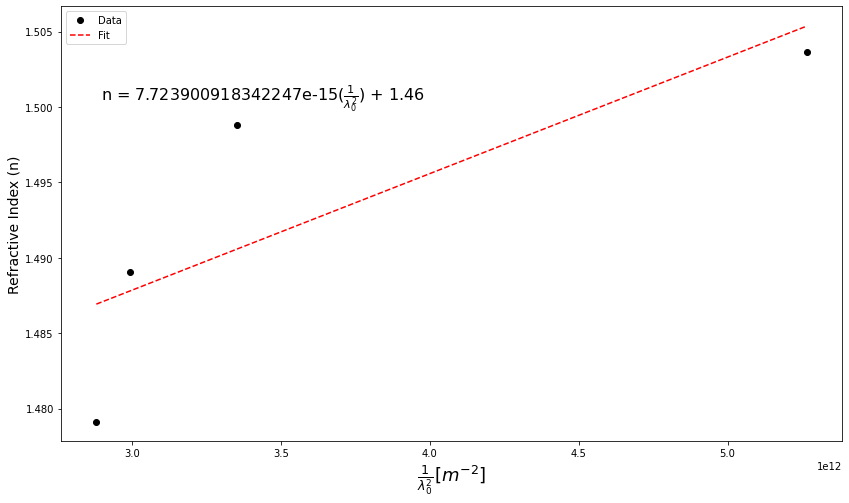

In [6]:
plt.figure(figsize = [14,8])
plt.plot(wavelength**-2, n, 'k.', markersize = 12, label = 'Data')

# linear fit
def model(x,m,b):
    y = m*x+b
    return y
fit = curve_fit(f = model ,xdata = (wavelength**-2), ydata = n)
y = fit[0][0] * (wavelength**-2) + fit[0][1]
plt.plot(wavelength**-2,y, 'r--', label = 'Fit')

plt.legend()
plt.xlabel(r'$\frac{1}{\lambda_{0}^{2}} [m^{-2}]$', fontsize = 18)
plt.ylabel('Refractive Index (n)', fontsize = 14)
plt.annotate(f'n = {fit[0][0]}' + r'($\frac{1}{\lambda_{0}^{2}}$)' + f' + {np.round(fit[0][1],2)}', 
             xy = [0.1,0.7], xycoords = 'figure fraction', fontsize = 16)

y_intercept = fit[0][1]
slope = fit[0][0]

In [7]:
print(f'C1 = {y_intercept}\nC2 = {slope} [m^2]')

C1 = 1.464693245953394
C2 = 7.723900918342247e-15 [m^2]
